# Handwritten Digit Classification using MNIST Dataset

## Downloading the Data

In [69]:
import time

import matplotlib.pyplot as plt
import tensorflow as tf

In [36]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## Explore the data

In [43]:
some_digit = X_train[0]

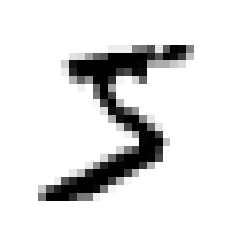

In [44]:
plt.imshow(some_digit, cmap="binary")
plt.axis("off")
plt.show()

## Reshape data for classification

In [57]:
X_train = X_train.reshape((60000, 28*28))

In [58]:
X_test = X_test.reshape((10000, 28*28))

## Strategies for Multi-class classification

### OvR (one-versus-the-rest)

* A system that can classify the digit images into 10 classes (from 0 to 9) by training 10 binary classifiers (a 0-detector, a 1-detector, a 2-detector,....)
* Get the decision score from each classifier for that image and select the class which outputs the highest score.

### OvO (one-versus-one)

* Train a binary classifier for each pair of digits (0s & 1s, 0s & 2s, 1s & 2s, etc.)

## Fitting an SVM (OvO)

In [59]:
from sklearn.svm import SVC
svm_clf = SVC()

svm_clf.fit(X_train, y_train)

SVC()

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
cross_val_score(svm_clf, X_train, y_train, cv = 3, scoring="accuracy")

array([0.977 , 0.9738, 0.9739])

In [64]:
from sklearn.model_selection import cross_val_predict

In [ ]:
a = time.time()

svm_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

b = time.time()

In [77]:
svm_pred

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [78]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, svm_pred)

In [79]:
conf_mx

array([[5863,    3,   10,    2,    4,    8,   14,    2,   13,    4],
       [   1, 6664,   26,    9,   10,    1,    3,   10,   10,    8],
       [  19,    9, 5811,   16,   26,    5,    8,   30,   28,    6],
       [   3,    9,   54, 5891,    2,   62,    1,   30,   61,   18],
       [   5,   11,   13,    0, 5712,    0,   20,    9,    4,   68],
       [  11,    6,   10,   57,   14, 5255,   35,    4,   17,   12],
       [  20,    8,    7,    0,   10,   32, 5831,    0,   10,    0],
       [   5,   21,   42,    6,   35,    2,    1, 6100,    7,   46],
       [   8,   29,   19,   38,   20,   39,   21,    9, 5646,   22],
       [  14,   11,    4,   31,   72,   16,    2,   59,   19, 5721]])

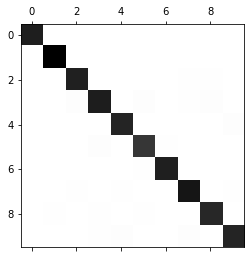

In [86]:
plt.matshow(conf_mx, cmap=plt.cm.gray_r)
plt.show()